In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import numpy as np
from sklearn.base import clone
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import SGDClassifier
from sklearn import datasets

In [2]:
digits=datasets.load_digits()
print(digits)

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]]), 'target': array([0, 1, 2, ..., 8, 9, 8]), 'target_names': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), 'images': array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ..., 15.,  5.,  0.],
        [ 0.,  3., 15., ..., 11.,  8.,  0.],
        ...,
        [ 0.,  4., 11., ..., 12.,  7.,  0.],
        [ 0.,  2., 14., ..., 12.,  0.,  0.],
        [ 0.,  0.,  6., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
        [ 0.,  0.,  0., ...,  9.,  0.,  0.],
        [ 0.,  0.,  3., ...,  6.,  0.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.]],

       [[ 0.,  0.,  0., ..., 12.,  0

In [3]:
X=digits['data']
y=digits['target']

print('X: '+ str(X.shape))
print('y: '+ str(y.shape))

X: (1797, 64)
y: (1797,)


In [4]:
def plot_digit(dataset, index=0):
    some_digit=dataset[index]
    some_digit_reshaped=some_digit.reshape(8,8)

    plt.imshow(some_digit_reshaped,cmap=matplotlib.cm.binary,interpolation='nearest')
    plt.axis('off')
    plt.show()

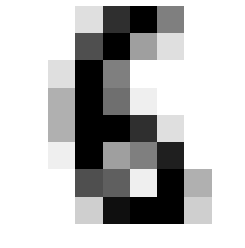

In [5]:
plot_digit(X,550)

### Split the data into train and test set

In [6]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,shuffle=True,random_state=42)
print('X_train: '+ str(X_train.shape))
print('y_train: '+ str(y_train.shape))
print('X_test: '+ str(X_test.shape))
print('y_test: '+ str(y_test.shape))

X_train: (1437, 64)
y_train: (1437,)
X_test: (360, 64)
y_test: (360,)


In [7]:
y_train_5=(y_train==5)
y_test_5=(y_test==5)

In [8]:
sgd_classifier=SGDClassifier(random_state=42,tol=1e-3,max_iter=1000)
sgd_classifier.fit(X_train,y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=1000,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=0.001,
       validation_fraction=0.1, verbose=0, warm_start=False)

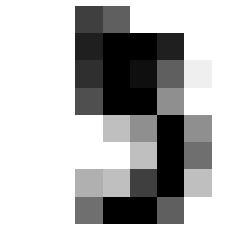

In [20]:
plot_digit(X,5)

In [23]:
y_pred=sgd_classifier.predict(X_test)
accuracy=sum(y_pred==y_test_5)/len(y_pred)

print('Accuracy: ',accuracy)

Accuracy:  0.9888888888888889


### Implement cross validation

In [28]:
skfolds=StratifiedKFold(n_splits=3,random_state=42)
accuracy=[]

for train_index,test_index in skfolds.split(X_train,y_train_5):
    clone_classifier=clone(sgd_classifier)
    
    # Train folds
    X_train_folds=X_train[train_index]
    y_train_folds=y_train_5[train_index]
    
    # Test folds
    X_test_folds=X_train[test_index]
    y_test_folds=y_train_5[test_index]
    
    clone_classifier.fit(X_train_folds,y_train_folds)
    y_pred=clone_classifier.predict(X_test_folds)
    
    accuracy.append(sum(y_pred==y_test_folds)/len(y_pred))
    
print('Accuracy: ',accuracy)

Accuracy:  [0.9895615866388309, 0.9916492693110647, 0.9916492693110647]


In [32]:
y_train_pred=cross_val_predict(sgd_classifier,X_train,y_train_5,cv=3)

In [33]:
confusion_matrix(y_train_5,y_train_pred)

array([[1296,    6],
       [   7,  128]])

In [37]:
precision= precision_score(y_train_5,y_train_pred)
recall= recall_score(y_train_5,y_train_pred)
f1score=f1_score(y_train_5,y_train_pred)

print('Precision: ',precision)
print('Recall: ',recall)
print('F1-score: ',f1score)

Precision:  0.9552238805970149
Recall:  0.9481481481481482
F1-score:  0.9516728624535316
